Q.2 Saksham Tiwari 20A2HP422

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
HR_data = pd.read_csv("https://raw.githubusercontent.com/rssmahesh1/MLAP2021Exam/main/MALP2021%20Question%20paper/HR_data.csv")
HR_data.info()
HR_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
HR_data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

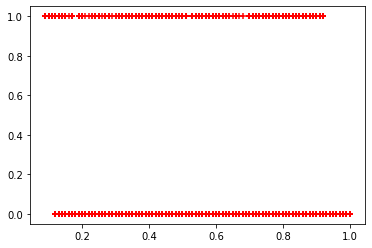

In [4]:
plt.scatter(HR_data.satisfaction_level,HR_data.left,marker='+',color='red')

In [5]:
import statsmodels.api as sm
Y = HR_data.left
X = sm.add_constant( HR_data[['satisfaction_level']] )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.2,
random_state = 42)

In [7]:
X_test

,const,satisfaction_level
6723,1.0,0.65
6473,1.0,0.88
4679,1.0,0.69
862,1.0,0.41
7286,1.0,0.87
...,...,...
3297,1.0,0.61
14113,1.0,0.93
5514,1.0,0.78
9939,1.0,0.89


In [8]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.471424
         Iterations 6


In [9]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.142     
Dependent Variable:   left             AIC:              11317.2326
Date:                 2021-10-19 12:17 BIC:              11332.0178
No. Observations:     11999            Log-Likelihood:   -5656.6   
Df Model:             1                LL-Null:          -6595.3   
Df Residuals:         11997            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               1.0135   0.0553  18.3274 0.0000  0.9051  1.1219
satisfaction_level -3.9029   0.0979 -39.8459 0.0000 -4.0949 -3.7109
===================================================================

"""

In [10]:
y_pred_df = pd.DataFrame( { "actual": y_test,
"predicted_prob": logit_model.predict(
sm.add_constant( X_test ) ) } )

In [11]:
y_pred_df.sample(5, random_state = 42)

,actual,predicted_prob
12673,1,0.393996
7937,0,0.289278
4787,0,0.084556
14427,1,0.403352
13423,0,0.058840


In [12]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(5, random_state = 42)

,actual,predicted_prob,predicted
12673,1,0.393996,0
7937,0,0.289278,0
4787,0,0.084556,0
14427,1,0.403352,0
13423,0,0.058840,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [14]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
                xticklabels = ["continue to work", "leave the company"] ,
                yticklabels = ["continue to work", "leave the company"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

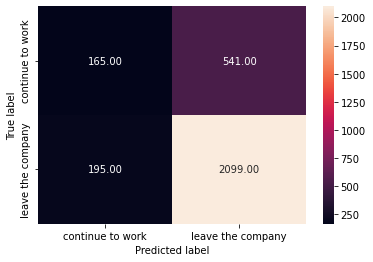

In [15]:
draw_cm( y_pred_df.actual,
y_pred_df.predicted )

In [16]:
print( metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2294
           1       0.46      0.23      0.31       706

    accuracy                           0.75      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.75      0.72      3000



In [17]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

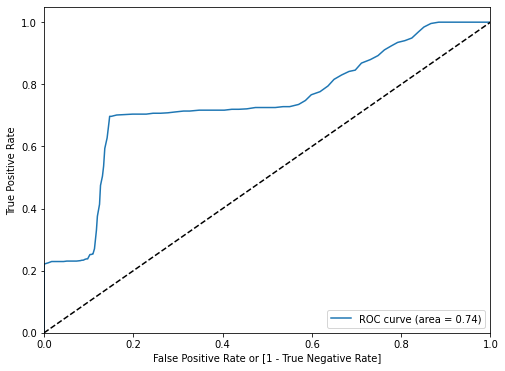

In [18]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,
y_pred_df.predicted_prob)

In [19]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.74